# Project - Twitter US Airline Sentiment

### 1. Overview
In this section, we're gonne do basic steps to:
- Import the libraries
- Load the dataset
- Print shape of data
- Print data description

In [1]:
# pip install contractions

In [2]:
import pandas as pd
import numpy as np
import contractions
import nltk
from bs4 import BeautifulSoup
import re, string, unicodedata
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Connect with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

# Read data from Tweets.csv stored in Google Colab Notebooks
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# Print the the shape of data
data.shape

(14640, 15)

In [5]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### 2. Understand the data columns

In [6]:
# Drop all other columns except “text” and “airline_sentiment”.
data = data[['text', 'airline_sentiment']]

In [7]:
# Print new shape of data
data.shape

(14640, 2)

In [8]:
# Checking missing data
data.isna().sum()

text                 0
airline_sentiment    0
dtype: int64

In [9]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [10]:
# Check the first 5 rows of data
pd.set_option('display.max_colwidth', None)
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


### 3. Text preprocessing: Data Preparation
As raw texts are unstructured, we can never use them for the training purpose. Therefore, We follow the steps below to structurize our data
- HTML tag removal
- Replace contractions
- Tokenization
- Remove stopwords
- Remove the numbers
- Remove special characters and punctuations
- Remove Non ASCII 
- Conversion to lowercase
- Lemmatize or Stemming
- Make complete processed text using "Join"


In [11]:
# HTML tag removal
def strip_html(text):
  soup = BeautifulSoup(text, 'html.parser')
  return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [12]:
# Replace contractions
def replace_contractions(text):
  return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [13]:
# Tokenization of data
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [14]:
# Remove the numbers
# Remove special characters and punctuations
def remove_num_punc_special_char(words):
  special_char = r'[^a-zA-Z0-9]'
  return [re.sub(special_char,'', word) for word in words]

data['text'] = data['text'].apply(lambda x: remove_num_punc_special_char(x))
data.head()

,text,airline_sentiment
0,"[, VirginAmerica, What, , dhepburn, said, ]",neutral
1,"[, VirginAmerica, plus, you, have, added, commercials, to, the, experience, , tacky, ]",positive
2,"[, VirginAmerica, I, did, not, today, , Must, mean, I, need, to, take, another, trip, ]",neutral
3,"[, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, , entertainment, , in, your, guests, , faces, , they, have, little, recourse]",negative
4,"[, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [15]:
# Download and make a list of stopwords
stopwords = stopwords.words('english')
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stopwords = list(set(stopwords) - set(customlist))

# Remove stopwords
def remove_stopwords(words):
  return [word for word in words if word not in stopwords]

data['text'] = data.apply(lambda row: remove_stopwords(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,"[, VirginAmerica, What, , dhepburn, said, ]",neutral
1,"[, VirginAmerica, plus, added, commercials, experience, , tacky, ]",positive
2,"[, VirginAmerica, I, not, today, , Must, mean, I, need, take, another, trip, ]",neutral
3,"[, VirginAmerica, really, aggressive, blast, obnoxious, , entertainment, , guests, , faces, , little, recourse]",negative
4,"[, VirginAmerica, really, big, bad, thing]",negative


In [16]:
# Remove Non ASCII 
def remove_non_ascii(words):
  return [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in words]

data['text'] = data['text'].apply(lambda x: remove_non_ascii(x))
data.head()

,text,airline_sentiment
0,"[, VirginAmerica, What, , dhepburn, said, ]",neutral
1,"[, VirginAmerica, plus, added, commercials, experience, , tacky, ]",positive
2,"[, VirginAmerica, I, not, today, , Must, mean, I, need, take, another, trip, ]",neutral
3,"[, VirginAmerica, really, aggressive, blast, obnoxious, , entertainment, , guests, , faces, , little, recourse]",negative
4,"[, VirginAmerica, really, big, bad, thing]",negative


In [17]:
# Conversion to lowercase
def to_lowercase(words):
  return [word.lower() for word in words]

data['text'] = data['text'].apply(lambda x: to_lowercase(x))
data.head()

,text,airline_sentiment
0,"[, virginamerica, what, , dhepburn, said, ]",neutral
1,"[, virginamerica, plus, added, commercials, experience, , tacky, ]",positive
2,"[, virginamerica, i, not, today, , must, mean, i, need, take, another, trip, ]",neutral
3,"[, virginamerica, really, aggressive, blast, obnoxious, , entertainment, , guests, , faces, , little, recourse]",negative
4,"[, virginamerica, really, big, bad, thing]",negative


In [18]:
# Lemmatize or Stemming
lemmatizer = WordNetLemmatizer()

def lemmatize_list(words):
  return [lemmatizer.lemmatize(word, pos='v') for word in words]

data['text'] = data['text'].apply(lambda x: lemmatize_list(x))
data.head()

,text,airline_sentiment
0,"[, virginamerica, what, , dhepburn, say, ]",neutral
1,"[, virginamerica, plus, add, commercials, experience, , tacky, ]",positive
2,"[, virginamerica, i, not, today, , must, mean, i, need, take, another, trip, ]",neutral
3,"[, virginamerica, really, aggressive, blast, obnoxious, , entertainment, , guests, , face, , little, recourse]",negative
4,"[, virginamerica, really, big, bad, thing]",negative


In [19]:
# Make complete processed text using "Join"
data['text'] = data['text'].apply(lambda x: ' '.join(x))
data.head()

,text,airline_sentiment
0,virginamerica what dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica i not today must mean i need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


### 4. Vectorization
There are 2 popular techniques to vectorize text data: **Count Vectorizer, Tf-Idf Vectorizer**

**Count Vectorizer**

In [20]:
# Vectorization - Convert text data to numbers
# Choosing the right number of feature is a challenge as the large number of feature will increase the processing time
bow_vec = CountVectorizer(max_features=2000) 
data_features = bow_vec.fit_transform(data['text'])
print(data_features.shape)

# Convert data features to array
data_features = data_features.toarray()
print(data_features)

(14640, 2000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Tf-Idf Vectorizer**

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
data_features_tfidf = tfidf_vectorizer.fit_transform(data['text'])
print(data_features_tfidf.shape)

# Convert data features to array
data_features_tfidf = data_features_tfidf.toarray()
print(data_features_tfidf)

(14640, 2000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 5. Fit and evaluate the model

**Count Vectorizer**

In [22]:
# Convert labels to numbers
def label_to_number(label):
  if label == 'negative':
    return 0
  if label == 'neutral':
    return 1
  if label == 'positive':
    return 2

labels = data['airline_sentiment'].apply(lambda label: label_to_number(label))

In [23]:
# Split data into training and testing set
X_train, X_test, y_train_label, y_test_label = train_test_split(data_features, labels, test_size=0.3, random_state=42)

# Perform OneHotCoding for label data
y_train = keras.utils.to_categorical(y_train_label,3)
y_test = keras.utils.to_categorical(y_test_label, 3)

In [24]:
# Using Random Forest to build model for the classification
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.721311475409836


In [25]:
# K-Fold Cross - validation .
# Finding optimal number of base learners using k-fold CV 
cv_scores = []
base_ln = [x for x in range(1, 25)]

for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

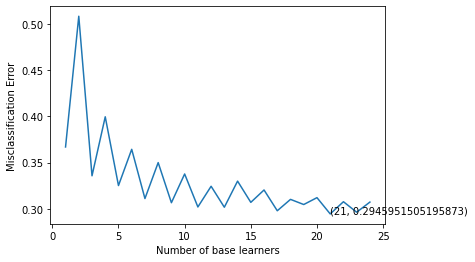

In [26]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [27]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.72632058287796

In [28]:
#saving the prediction on test data as a result
y_predict =  clf.predict(X_test)

[[2609  153   52]
 [ 453  382   49]
 [ 224   82  388]]


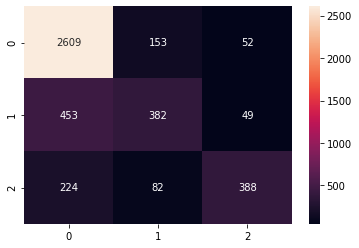

In [29]:
# Make confusion matrix
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))

cm = metrics.confusion_matrix(y_test_label,y_pred)
print(cm)

# Create heat map
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

**TF-IDF Vectorizer**

In [30]:
# Split data into training and testing set
X_train_tfidf, X_test_tfidf, y_train_label, y_test_label = train_test_split(data_features_tfidf, labels, test_size=0.3, random_state=42)

# Perform OneHotCoding for label data
y_train_tfidf = keras.utils.to_categorical(y_train_label,3)
y_test_tfidf = keras.utils.to_categorical(y_test_label, 3)

In [31]:
# Using Random Forest to build model for the classification
forest_tfidf = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest_tfidf = forest_tfidf.fit(X_train_tfidf, y_train_tfidf)

print(forest_tfidf)
print(np.mean(cross_val_score(forest_tfidf, data_features_tfidf, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7145491803278688


In [32]:
# K-Fold Cross - validation .
# Finding optimal number of base learners using k-fold CV 
cv_scores_tfidf = []
base_ln = [x for x in range(1, 25)]

for b in base_ln:
    clf_tfidf = RandomForestClassifier(n_estimators = b)
    scores_tfidf = cross_val_score(clf_tfidf, X_train_tfidf, y_train_tfidf, cv = 5, scoring = 'accuracy')
    cv_scores_tfidf.append(scores_tfidf.mean())

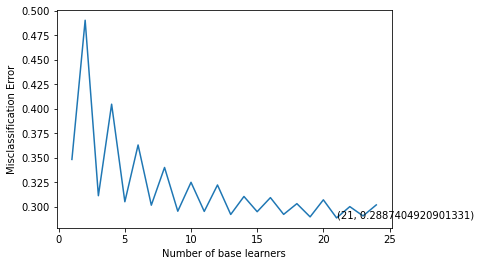

In [33]:
# plotting the error as k increases
error = [1 - x for x in cv_scores_tfidf]                                 #error corresponds to each nu of estimator
optimal_learners_tfidf = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners_tfidf, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [34]:
# Training the best model and calculating accuracy on test data .
clf_tfidf = RandomForestClassifier(n_estimators = optimal_learners_tfidf)
clf_tfidf.fit(X_train_tfidf, y_train_tfidf)
clf_tfidf.score(X_test_tfidf, y_test_tfidf)

0.729735883424408

In [35]:
# Saving the prediction on test data as a result
y_predict_tfidf =  clf_tfidf.predict(X_test_tfidf)  

[[2679   95   40]
 [ 527  312   45]
 [ 291   64  339]]


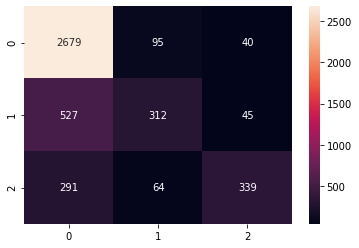

In [36]:
# Make confusion matrix
y_pred = []
for val in y_predict_tfidf:
    y_pred.append(np.argmax(val))

cm = metrics.confusion_matrix(y_test_label,y_pred)
print(cm)

# Create heat map 
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### 6. Summarize
We summarize our understanding of the application of various data pre-processing and vectorization technique, also the performance of our model

- The goal of this project is to build a model to to classify text sentiment that help Ariline understand their customers more by analyzing their comments on Twitter so that they can have a right marketing campaign or improve their flying services.
- The dataset has 2 main field: **Airline Sentiment** and **Comment Text**
- The data is pre-processed by various techniques and libraries, then converted to numbers using 2 popular vectorizer: **Count Vectorizer** and **TF-IDF Vectorizer**
- The processed data is fed into the model RandomForest for classification purpose, the model parameters are also optimized to increase the overall accuracy
- As we can see the performance of models using **Count Vectorizer** and **TF-IDF Vectorizer** are almost the same
- The max_feature in the vectorizer can be increased to have a higher model performance.
- Other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques to increase the overall accuracy even further.